In [124]:
# Kalman filter example demo in Python

# A Python implementation of the example given in pages 11-15 of "An
# Introduction to the Kalman Filter" by Greg Welch and Gary Bishop,
# University of North Carolina at Chapel Hill, Department of Computer
# Science, TR 95-041,
# http://www.cs.unc.edu/~welch/kalman/kalmanIntro.html

# by Andrew D. Straw

import numpy
import pylab
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [ ]:
# intial parameters
n_iter = 50
sz = (n_iter, ) # size of array
x = -0.37727 # truth value (typo in example at top of p. 13 calls this z)
z = numpy.random.normal(x, 0.1, size=sz) # observations (normal about x, sigma=0.1)

In [ ]:
sz

In [ ]:
Q = 1e-5 # process variance

# allocate space for arrays
xhat = numpy.zeros(sz)      # a posteri estimate of x
P = numpy.zeros(sz)         # a posteri error estimate
xhatminus = numpy.zeros(sz) # a priori estimate of x
Pminus = numpy.zeros(sz)    # a priori error estimate
K = numpy.zeros(sz)         # gain or blending factor

In [ ]:
Pminus

In [ ]:
R = 0.1**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1] + Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k] + K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

pylab.figure()
pylab.plot(z,'k+',label='noisy measurements')
pylab.plot(xhat,'b-',label='a posteri estimate')
pylab.axhline(x,color='g',label='truth value')
pylab.legend()
pylab.xlabel('Iteration')
pylab.ylabel('Voltage')

pylab.figure()
valid_iter = range(1,n_iter) # Pminus not valid at step 0
pylab.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
pylab.xlabel('Iteration')
pylab.ylabel('$(Voltage)^2$')
pylab.setp(pylab.gca(),'ylim',[0,.01])
pylab.show()

In [34]:
from numpy import dot
from numpy import dot, sum, tile, linalg
from numpy.linalg import inv
from numpy import *
from numpy.linalg import inv



class KalmanFilterBackbone(object):
   
    def kf_predict(X, P, A, Q, B, U):
        X = dot(A, X) + dot(B, U)
        P = dot(A, dot(P, A.T)) + Q
        return(X,P)


    def kf_update(X, P, Y, H, R):
        IM = dot(H, X)
        IS = R + dot(H, dot(P, H.T))
        K = dot(P, dot(H.T, inv(IS)))
        X = X + dot(K, (Y-IM))
        P = P - dot(K, dot(IS, K.T))
        LH = gauss_pdf(Y, IM, IS)
        return (X,P,K,IM,IS,LH)


    def gauss_pdf(X, M, S):
        if M.shape()[1] == 1:
            DX = X - tile(M, X.shape()[1])
            E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
            E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
            P = exp(-E)
        elif X.shape()[1] == 1:
            DX = tile(X, M.shape()[1])- M
            E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
            E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
            P = exp(-E)
        else:
            DX = X-M
            E = 0.5 * dot(DX.T, dot(inv(S), DX))
            E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
            P = exp(-E)
            return (P[0],E[0])


class KalmanFilter(KalmanFilterBackbone):
    def __init__(self):

        #Initialization of state matrices
        X= array([[0.0], [0.0], [0.1], [0.1]])
        P= diag((0.01, 0.01, 0.01, 0.01))
        A= array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0,1]])
        Q = eye(X.shape[0])
        B = eye(X.shape[0])
        U = zeros((X.shape[0],1))

        # Measurement matrices
        Y = array([[X[0,0] + abs(random.randn(1)[0])], [X[1,0] + abs(random.randn(1)[0])]])
        H = array([[1, 0, 0, 0], [0, 1, 0, 0]])
        R = eye(Y.shape[0])
        
        #time step of mobile movement
        self.dt =  0.1 #time_step    #.1

       

    # Applying the Kalman Filter
    def kfpredict(self):
        (X, P) = self.kf_predict(X, P, A, Q, B, U) #kf_predict(X, P, A, Q, B, U)
        (X, P, K, IM, IS, LH) = kf_update(X, P, Y, H, R)
        Y = array([[X[0,0] + abs(0.1 * randn(1)[0])],[X[1, 0] + abs(0.1 * randn(1)[0])]])



In [35]:
k = KalmanFilter()
k.kfpredict()

UnboundLocalError: local variable 'X' referenced before assignment

In [122]:
from numpy import dot
from numpy import dot, sum, tile, linalg
from numpy.linalg import inv
import numpy as np
from numpy import *
from numpy.linalg import inv

def kf_predict(X, P, A, Q, B, U):
    X = dot(A, X) + dot(B, U)
    P = dot(A, dot(P, A.T)) + Q
    return (X, P)


def kf_update(X, P, Y, H, R):
    IM = dot(H, X)
    IS = R + dot(H, dot(P, H.T))
    K = dot(P, dot(H.T, inv(IS)))
    X = X + dot(K, (Y - IM))
    P = P - dot(K, dot(IS, K.T))
#    print type(Y), type(IM), type(IS)
#    print Y, IM, IS
#    print IM.shape, Y.shape
    #LH = gauss_pdf(Y, IM, IS) #gauss_pdf(Y, IM, IS)
    # gauss_pdf(Y, IM, IS)
    LH = gauss_pdf(Y, IM, IS)

    return (X, P, K, IM, IS, LH)


def gauss_pdf(X, M, S):
    #print type(X), type(M), type(S)
    #print X.shape, M.shape
    if M.shape[1] == 1:
        DX = X - tile(M, X.shape[1])
        E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
        E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
        P = exp(-E)
    elif X.shape[1] == 1:
        DX = tile(X, M.shape[1])- M
        E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
        E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
        P = exp(-E)
    else:
        DX = X-M
        E = 0.5 * dot(DX.T, dot(inv(S), DX))
        E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
        P = exp(-E)
    #  (P[0], E[0])
    return (P[0], E[0])
    #return (0, 0)


def test():
    
    #time step of mobile movement                                                                                              
    dt = 0.1
    # Initialization of state matrices                                                                                         
    X = array([[0.0], [0.0], [0.1], [0.1]])
    P = diag((0.01, 0.01, 0.01, 0.01))
    A = array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
    Q = eye(X.shape[0])
    B = eye(X.shape[0])
    U = zeros((X.shape[0],1))

    # Measurement matrices                                                                                                     
    Y = array([[X[0,0] + abs(np.random.randn(1)[0])], [X[1,0] + abs(np.random.randn(1)[0])]])
    H = array([[1, 0, 0, 0], [0, 1, 0, 0]])
    R = eye(Y.shape[0])
    # Number of iterations in Kalman Filter                                                                                    
    N_iter = 50
    # Applying the Kalman Filter                                                                                               
    for i in arange(0, N_iter):
        (X, P) = kf_predict(X, P, A, Q, B, U) #kf_predict(X, P, A, Q, B, U)
        (X, P, K, IM, IS, LH) = kf_update(X, P, Y, H, R) #kf_update(X, P, Y, H, R)
        Y = array([[X[0, 0] + abs(0.1 * np.random.randn(1)[0])], 
                   [X[1, 0] + abs(0.1 * np.random.randn(1)[0])]])

test()


In [119]:
import numpy as np

from numpy import *
from numpy.linalg import inv,det
    #time step of mobile movement                                                                                              
dt = 0.1
# Initialization of state matrices                                                                                         
X = array([[0.0], [0.0], [0.1], [0.1]])
P = diag((0.01, 0.01, 0.01, 0.01))
A = array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
Q = eye(X.shape[0])
B = eye(X.shape[0])
U = zeros((X.shape[0],1))

# Measurement matrices                                                                                                     
Y = array([[X[0,0] + abs(np.random.randn(1)[0])], [X[1,0] + abs(np.random.randn(1)[0])]])
H = array([[1, 0, 0, 0], [0, 1, 0, 0]])
R = eye(Y.shape[0])
# Number of iterations in Kalman Filter                                                                                    
N_iter = 50
# Applying the Kalman Filter                                                                                               
for i in arange(0, N_iter):
    (X, P) = kf_perdict(X, P, A, Q, B, U) #kf_predict(X, P, A, Q, B, U)
    (X, P, K, IM, IS, LH) = kf_update(X, P, Y, H, R)
    Y = array([[X[0, 0] + abs(0.1 * np.random.randn(1)[0])], \
              [X[1, 0] + abs(0.1 * np.random.randn(1)[0])]])

In [120]:

Y

array([[ 3.5294837 ],
       [ 3.89099307]])

In [ ]:
np.random.randn(1)

In [ ]:

# kalman2.py
# written by Greg Czerniak (email is greg {aT] czerniak [dOt} info )
#
# Implements a multi-variable linear Kalman filter.
#
# Note: This code is part of a larger tutorial "Kalman Filters for Undergrads"
# located at http://greg.czerniak.info/node/5.

import pylab
import math
import random
import numpy

# Implements a linear Kalman filter.
class KalmanFilterLinear:
  def __init__(self,_A, _B, _H, _x, _P, _Q, _R):
    self.A = _A                      # State transition matrix.
    self.B = _B                      # Control matrix.
    self.H = _H                      # Observation matrix.
    self.current_state_estimate = _x # Initial state estimate.
    self.current_prob_estimate = _P  # Initial covariance estimate.
    self.Q = _Q                      # Estimated error in process.
    self.R = _R                      # Estimated error in measurements.
  def GetCurrentState(self):
    return self.current_state_estimate
  def Step(self,control_vector,measurement_vector):
    #---------------------------Prediction step-----------------------------
    predicted_state_estimate = self.A * self.current_state_estimate + self.B * control_vector
    predicted_prob_estimate = (self.A * self.current_prob_estimate) * numpy.transpose(self.A) + self.Q
    #--------------------------Observation step-----------------------------
    innovation = measurement_vector - self.H*predicted_state_estimate
    innovation_covariance = self.H*predicted_prob_estimate*numpy.transpose(self.H) + self.R
    #-----------------------------Update step-------------------------------
    kalman_gain = predicted_prob_estimate * numpy.transpose(self.H) * numpy.linalg.inv(innovation_covariance)
    self.current_state_estimate = predicted_state_estimate + kalman_gain * innovation
    # We need the size of the matrix so we can make an identity matrix.
    size = self.current_prob_estimate.shape[0]
    # eye(n) = nxn identity matrix.
    self.current_prob_estimate = (numpy.eye(size)-kalman_gain*self.H)*predicted_prob_estimate

# Simulates the classic physics problem of a cannon shooting a ball in a
# parabolic arc.  In addition to giving "true" values back, you can also ask
# for noisy values back to test Kalman filters.
class Cannon:
  #--------------------------------VARIABLES----------------------------------
  angle = 45 # The angle from the ground to point the cannon.
  muzzle_velocity = 100 # Muzzle velocity of the cannon.
  gravity = [0,-9.81] # A vector containing gravitational acceleration.
  # The initial velocity of the cannonball
  velocity = [muzzle_velocity*math.cos(angle*math.pi/180), muzzle_velocity*math.sin(angle*math.pi/180)]
  loc = [0,0] # The initial location of the cannonball.
  acceleration = [0,0] # The initial acceleration of the cannonball.
  #---------------------------------METHODS-----------------------------------
  def __init__(self,_timeslice,_noiselevel):
    self.timeslice = _timeslice
    self.noiselevel = _noiselevel
  def add(self,x,y):
    return x + y
  def mult(self,x,y):
    return x * y
  def GetX(self):
    return self.loc[0]
  def GetY(self):
    return self.loc[1]
  def GetXWithNoise(self):
    return random.gauss(self.GetX(),self.noiselevel)
  def GetYWithNoise(self):
    return random.gauss(self.GetY(),self.noiselevel)
  def GetXVelocity(self):
    return self.velocity[0]
  def GetYVelocity(self):
    return self.velocity[1]
  # Increment through the next timeslice of the simulation.
  def Step(self):
    # We're gonna use this vector to timeslice everything.
    timeslicevec = [self.timeslice,self.timeslice]
    # Break gravitational force into a smaller time slice.
    sliced_gravity = map(self.mult,self.gravity,timeslicevec)
    # The only force on the cannonball is gravity.
    sliced_acceleration = sliced_gravity
    # Apply the acceleration to velocity.
    self.velocity = map(self.add, self.velocity, sliced_acceleration)
    sliced_velocity = map(self.mult, self.velocity, timeslicevec )
    # Apply the velocity to location.
    self.loc = map(self.add, self.loc, sliced_velocity)
    # Cannonballs shouldn't go into the ground.
    if self.loc[1] < 0:
      self.loc[1] = 0

#=============================REAL PROGRAM START================================
# Let's go over the physics behind the cannon shot, just to make sure it's
# correct:
# sin(45)*100 = 70.710 and cos(45)*100 = 70.710
# vf = vo + at
# 0 = 70.710 + (-9.81)t
# t = 70.710/9.81 = 7.208 seconds for half
# 14.416 seconds for full journey
# distance = 70.710 m/s * 14.416 sec = 1019.36796 m

timeslice = 0.1 # How many seconds should elapse per iteration?
iterations = 144 # How many iterations should the simulation run for?
# (notice that the full journey takes 14.416 seconds, so 145 iterations will
# cover the whole thing when timeslice = 0.10)
noiselevel = 30  # How much noise should we add to the noisy measurements?
muzzle_velocity = 100 # How fast should the cannonball come out?
angle = 45 # Angle from the ground.

# These are arrays to store the data points we want to plot at the end.
x = []
y = []
nx = []
ny = []
kx = []
ky = []

# Let's make a cannon simulation.
c = Cannon(timeslice,noiselevel)

speedX = muzzle_velocity*math.cos(angle*math.pi/180)
speedY = muzzle_velocity*math.sin(angle*math.pi/180)

# This is the state transition vector, which represents part of the kinematics.
# 1, ts, 0,  0  =>  x(n+1) = x(n) + vx(n)
# 0,  1, 0,  0  => vx(n+1) =        vx(n)
# 0,  0, 1, ts  =>  y(n+1) =              y(n) + vy(n)
# 0,  0, 0,  1  => vy(n+1) =                     vy(n)
# Remember, acceleration gets added to these at the control vector.
state_transition = numpy.matrix([[1,timeslice,0,0],[0,1,0,0],[0,0,1,timeslice],[0,0,0,1]])

control_matrix = numpy.matrix([[0,0,0,0],[0,0,0,0],[0,0,1,0],[0,0,0,1]])
# The control vector, which adds acceleration to the kinematic equations.
# 0          =>  x(n+1) =  x(n+1)
# 0          => vx(n+1) = vx(n+1)
# -9.81*ts^2 =>  y(n+1) =  y(n+1) + 0.5*-9.81*ts^2
# -9.81*ts   => vy(n+1) = vy(n+1) + -9.81*ts
control_vector = numpy.matrix([[0],[0],[0.5*-9.81*timeslice*timeslice],[-9.81*timeslice]])

# After state transition and control, here are the equations:
#  x(n+1) = x(n) + vx(n)
# vx(n+1) = vx(n)
#  y(n+1) = y(n) + vy(n) - 0.5*9.81*ts^2
# vy(n+1) = vy(n) + -9.81*ts
# Which, if you recall, are the equations of motion for a parabola.  Perfect.

# Observation matrix is the identity matrix, since we can get direct
# measurements of all values in our example.
observation_matrix = numpy.eye(4)

# This is our guess of the initial state.  I intentionally set the Y value
# wrong to illustrate how fast the Kalman filter will pick up on that.
initial_state = numpy.matrix([[0],[speedX],[500],[speedY]])

initial_probability = numpy.eye(4)

process_covariance = numpy.zeros(4)
measurement_covariance = numpy.eye(4)*0.2

kf = KalmanFilterLinear(state_transition, control_matrix, observation_matrix, initial_state, initial_probability, process_covariance, measurement_covariance)

# Iterate through the simulation.
for i in range(iterations):
    x.append(c.GetX())
    y.append(c.GetY())
    newestX = c.GetXWithNoise()
    newestY = c.GetYWithNoise()
    nx.append(newestX)
    ny.append(newestY)
    # Iterate the cannon simulation to the next timeslice.
    c.Step()
    kx.append(kf.GetCurrentState()[0,0])
    ky.append(kf.GetCurrentState()[2,0])
    kf.Step(control_vector,numpy.matrix([[newestX],[c.GetXVelocity()],[newestY],[c.GetYVelocity()]]))

# Plot all the results we got.
pylab.plot(x,y,'-',nx,ny,':',kx,ky,'--')
pylab.xlabel('X position')
pylab.ylabel('Y position')
pylab.title('Measurement of a Cannonball in Flight')
pylab.legend(('true','measured','kalman'))
pylab.show()

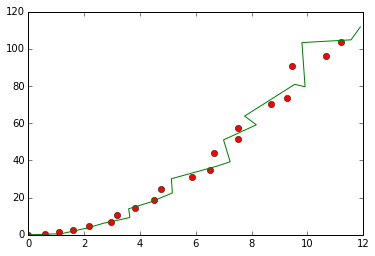

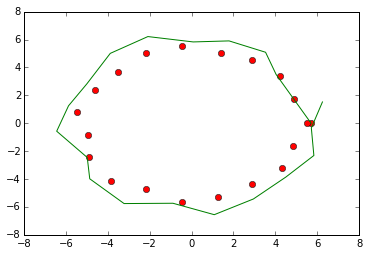

In [125]:
import numpy as np
import matplotlib.pyplot as plt

def kalman_xy(x, P, measurement, R,
              motion = np.matrix('0. 0. 0. 0.').T,
              Q = np.matrix(np.eye(4))):
    """
    Parameters:    
    x: initial state 4-tuple of location and velocity: (x0, x1, x0_dot, x1_dot)
    P: initial uncertainty convariance matrix
    measurement: observed position
    R: measurement noise 
    motion: external motion added to state vector x
    Q: motion noise (same shape as P)
    """
    return kalman(x, P, measurement, R, motion, Q,
                  F = np.matrix('''
                      1. 0. 1. 0.;
                      0. 1. 0. 1.;
                      0. 0. 1. 0.;
                      0. 0. 0. 1.
                      '''),
                  H = np.matrix('''
                      1. 0. 0. 0.;
                      0. 1. 0. 0.'''))

def kalman(x, P, measurement, R, motion, Q, F, H):
    '''
    Parameters:
    x: initial state
    P: initial uncertainty convariance matrix
    measurement: observed position (same shape as H*x)
    R: measurement noise (same shape as H)
    motion: external motion added to state vector x
    Q: motion noise (same shape as P)
    F: next state function: x_prime = F*x
    H: measurement function: position = H*x

    Return: the updated and predicted new values for (x, P)

    See also http://en.wikipedia.org/wiki/Kalman_filter

    This version of kalman can be applied to many different situations by
    appropriately defining F and H 
    '''
    # UPDATE x, P based on measurement m    
    # distance between measured and current position-belief
    y = np.matrix(measurement).T - H * x
    S = H * P * H.T + R  # residual convariance
    K = P * H.T * S.I    # Kalman gain
    x = x + K*y
    I = np.matrix(np.eye(F.shape[0])) # identity matrix
    P = (I - K*H)*P

    # PREDICT x, P based on motion
    x = F*x + motion
    P = F*P*F.T + Q

    return x, P

def demo_kalman_xy(iopt=1):
    x = np.matrix('0. 0. 0. 0.').T 
    P = np.matrix(np.eye(4))*1000 # initial uncertainty

    N = 20

    if iopt == 1: 
        true_x =  np.linspace(0.0, 10.0, N)
        true_y = (true_x)**2
    elif iopt == 2:
        theta = np.linspace(0, 2 * np.pi, N)
        true_x =  5 * np.cos(theta)
        true_y =  5 * np.sin(theta)

    
    observed_x = true_x + 0.15 * np.random.random(N)*true_x
    observed_y = true_y + 0.15 * np.random.random(N)*true_y 
    plt.plot(observed_x, observed_y, 'ro')
    
    result = []
    R = 0.01**2
    for meas in zip(observed_x, observed_y):
        x, P = kalman_xy(x, P, meas, R)
        result.append((x[:2]).tolist())
    kalman_x, kalman_y = zip(*result)
    plt.plot(kalman_x, kalman_y, 'g-')
    plt.show()

demo_kalman_xy(1)
demo_kalman_xy(2)

In [ ]:
np.append( np.linspace(0.0, 10.0, 20), np.linspace(10, 0.0, 20))

In [ ]:
x = np.cos(np.linspace(0., 2*np.pi, 20))
y = np.sin(np.linspace(0., 2*np.pi, 20))

In [ ]:
plt.plot(x, y)

In [ ]:
zip(x, y)